In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import scipy
from scipy.stats import zscore
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


In [59]:
df=pd.read_csv('Table1.csv')

In [60]:
df1=pd.DataFrame(data=df)

In [61]:
df1

,SLNo,ShoeName,Category,Price
0,0,PUMA x LAMELO BALL MB.01 Golden Child Men's Ba...,Men,140.00
1,1,PUMA x LAMELO BALL MB.03 Toxic Men's Basketbal...,Women,125.00
2,2,PUMA x LAMELO BALL MB.01 Golden Child Big Kids...,Men,120.00
3,3,FENTY x PUMA Creeper Phatty Women's Sneakers,Women,140.00
4,4,Viz Runner Repeat Men's Running Sneakers,Men,42.99
...,...,...,...,...
82,82,Cell Phase Femme Women's Running Shoes,Men,40.99
83,83,Fast-R NITRO™ Elite Women's Running Shoes,Men,260.00
84,84,Cell Phase Femme Women's Running Shoes,Women,40.99
85,85,Fast-R NITRO™ Elite Women's Running Shoes,Men,260.00


In [62]:
dff=pd.read_csv('Table2.csv')

In [63]:
df2=pd.DataFrame(data=dff)

In [64]:
dfff=pd.read_csv('Table3.csv')

In [65]:
df3=pd.DataFrame(data=dfff)

In [66]:
df2

,SLNo,StyleName,ColorName
0,0,Metallic Gold-Fiery Coral,Gold
1,1,Purple Glimmer-Green Gecko,Purple
2,2,Metallic Gold-Fiery Coral,Gold
3,3,PUMA Black-Warm White-Gum,White
4,4,Puma Black-Puma White,White
...,...,...,...
82,82,Ash Gray-PUMA White-PUMA Silver,Silver
83,83,For All Time Red-Ultra Blue,Blue
84,84,PUMA Black-Koral Ice,Black
85,85,PUMA White-Fire Orchid,White


In [67]:
df3

,SLNo,NoOfColor,Review,StarRating
0,0,1,18,94
1,1,1,77,81
2,2,1,4,94
3,3,3,6,90
4,4,3,2,60
...,...,...,...,...
82,82,2,7,0
83,83,2,1,90
84,84,1,5,80
85,85,2,8,79


In [68]:
concate=pd.merge(df1,df3,on='SLNo',how='inner')

In [69]:
concate2=pd.merge(concate,df2,on='SLNo',how='inner')

In [70]:
concate2

,SLNo,ShoeName,Category,Price,NoOfColor,Review,StarRating,StyleName,ColorName
0,0,PUMA x LAMELO BALL MB.01 Golden Child Men's Ba...,Men,140.00,1,18,94,Metallic Gold-Fiery Coral,Gold
1,1,PUMA x LAMELO BALL MB.03 Toxic Men's Basketbal...,Women,125.00,1,77,81,Purple Glimmer-Green Gecko,Purple
2,2,PUMA x LAMELO BALL MB.01 Golden Child Big Kids...,Men,120.00,1,4,94,Metallic Gold-Fiery Coral,Gold
3,3,FENTY x PUMA Creeper Phatty Women's Sneakers,Women,140.00,3,6,90,PUMA Black-Warm White-Gum,White
4,4,Viz Runner Repeat Men's Running Sneakers,Men,42.99,3,2,60,Puma Black-Puma White,White
...,...,...,...,...,...,...,...,...,...
82,82,Cell Phase Femme Women's Running Shoes,Men,40.99,2,7,0,Ash Gray-PUMA White-PUMA Silver,Silver
83,83,Fast-R NITRO™ Elite Women's Running Shoes,Men,260.00,2,1,90,For All Time Red-Ultra Blue,Blue
84,84,Cell Phase Femme Women's Running Shoes,Women,40.99,1,5,80,PUMA Black-Koral Ice,Black
85,85,Fast-R NITRO™ Elite Women's Running Shoes,Men,260.00,2,8,79,PUMA White-Fire Orchid,White


In [71]:
concate2.shape

(87, 9)

In [72]:
concate2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SLNo        87 non-null     int64  
 1   ShoeName    87 non-null     object 
 2   Category    87 non-null     object 
 3   Price       87 non-null     float64
 4   NoOfColor   87 non-null     int64  
 5   Review      87 non-null     int64  
 6   StarRating  87 non-null     int64  
 7   StyleName   87 non-null     object 
 8   ColorName   87 non-null     object 
dtypes: float64(1), int64(4), object(4)
memory usage: 6.2+ KB


In [73]:
concate2.describe()

,SLNo,Price,NoOfColor,Review,StarRating
count,87.000000,87.000000,87.000000,87.000000,87.000000
mean,43.000000,106.465057,2.344828,38.298851,63.298851
std,25.258662,106.449940,1.816127,49.148828,36.633989
min,0.000000,32.990000,1.000000,1.000000,0.000000
25%,21.500000,40.990000,1.000000,5.500000,50.000000
50%,43.000000,59.990000,2.000000,11.000000,80.000000
75%,64.500000,125.000000,3.000000,54.500000,90.000000
max,86.000000,450.000000,9.000000,179.000000,100.000000


In [74]:
#missing value visualization

<Axes: >

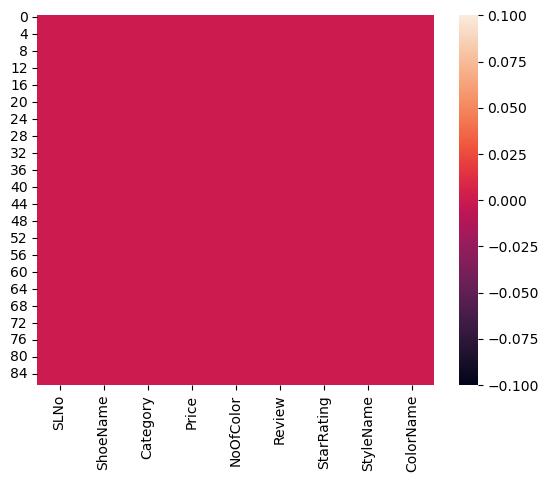

In [75]:
sns.heatmap(concate2.isnull())

In [76]:
shoe=concate2.drop(['ShoeName','StyleName'],axis=1)

In [77]:
shoe

,SLNo,Category,Price,NoOfColor,Review,StarRating,ColorName
0,0,Men,140.00,1,18,94,Gold
1,1,Women,125.00,1,77,81,Purple
2,2,Men,120.00,1,4,94,Gold
3,3,Women,140.00,3,6,90,White
4,4,Men,42.99,3,2,60,White
...,...,...,...,...,...,...,...
82,82,Men,40.99,2,7,0,Silver
83,83,Men,260.00,2,1,90,Blue
84,84,Women,40.99,1,5,80,Black
85,85,Men,260.00,2,8,79,White


In [78]:
le=LabelEncoder()

In [79]:
shoe['Category']=le.fit_transform(shoe['Category'])

In [80]:
shoe

,SLNo,Category,Price,NoOfColor,Review,StarRating,ColorName
0,0,0,140.00,1,18,94,Gold
1,1,1,125.00,1,77,81,Purple
2,2,0,120.00,1,4,94,Gold
3,3,1,140.00,3,6,90,White
4,4,0,42.99,3,2,60,White
...,...,...,...,...,...,...,...
82,82,0,40.99,2,7,0,Silver
83,83,0,260.00,2,1,90,Blue
84,84,1,40.99,1,5,80,Black
85,85,0,260.00,2,8,79,White


In [81]:
shoe['ColorName']=le.fit_transform(shoe['ColorName'])

In [82]:
shoe

,SLNo,Category,Price,NoOfColor,Review,StarRating,ColorName
0,0,0,140.00,1,18,94,2
1,1,1,125.00,1,77,81,7
2,2,0,120.00,1,4,94,2
3,3,1,140.00,3,6,90,10
4,4,0,42.99,3,2,60,10
...,...,...,...,...,...,...,...
82,82,0,40.99,2,7,0,9
83,83,0,260.00,2,1,90,1
84,84,1,40.99,1,5,80,0
85,85,0,260.00,2,8,79,10


In [83]:
Shoecor=shoe.corr()

In [85]:
Shoecor

,SLNo,Category,Price,NoOfColor,Review,StarRating,ColorName
SLNo,1.000000,0.026962,-0.031300,-0.038276,-0.032305,-0.136583,0.055004
Category,0.026962,1.000000,0.071942,-0.111759,0.203412,-0.001969,-0.121104
Price,-0.031300,0.071942,1.000000,-0.242335,0.091719,-0.385767,-0.051541
NoOfColor,-0.038276,-0.111759,-0.242335,1.000000,-0.009766,0.211305,-0.040740
Review,-0.032305,0.203412,0.091719,-0.009766,1.000000,-0.121424,-0.152738
StarRating,-0.136583,-0.001969,-0.385767,0.211305,-0.121424,1.000000,0.010476
ColorName,0.055004,-0.121104,-0.051541,-0.040740,-0.152738,0.010476,1.000000


In [87]:
shoe.shape

(87, 7)

In [91]:
z=np.abs(zscore(shoe))

In [92]:
z

,SLNo,Category,Price,NoOfColor,Review,StarRating,ColorName
0,1.712255,0.725476,0.316856,0.744785,0.415402,0.842909,0.677321
1,1.672435,1.378405,0.175128,0.744785,0.791993,0.485990,0.482658
2,1.632616,0.725476,0.127886,0.744785,0.701903,0.842909,0.677321
3,1.592796,1.378405,0.316856,0.362844,0.660974,0.733088,1.178646
4,1.552976,0.725476,0.599747,0.362844,0.742831,0.090571,1.178646
...,...,...,...,...,...,...,...
82,1.552976,0.725476,0.618644,0.190970,0.640510,1.737889,0.946650
83,1.592796,0.725476,1.450682,0.190970,0.763295,0.733088,0.909317
84,1.632616,1.378405,0.618644,0.744785,0.681438,0.458535,1.141313
85,1.672435,0.725476,1.450682,0.190970,0.620045,0.431080,1.178646


In [93]:
threshold=3
print(np.where(z>3))

(array([ 6, 20, 23, 24, 25, 27, 53], dtype=int64), array([3, 3, 2, 2, 2, 2, 3], dtype=int64))


In [97]:

alphavalue={'alpha':[1,0.1,0.01,0.001,0.0001,0]}

In [99]:
model=Ridge()

In [101]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge


In [110]:
x=shoe['Price']
y=shoe['StarRating']
